In [120]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd
# ref = https://fbref.com/en/comps/12/stats/La-Liga-Stats

In [121]:
dataframe=pd.read_csv("../Data/player_stats_updated.csv",sep=',', header=1,encoding='unicode_escape')
dataframe

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Unnamed: 33
0,1,Luis Abram,pe PER,DF,Granada,25.0,1996.0,8,6,560,...,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches,NaN
1,2,Marcos Acua,ar ARG,DF,Sevilla,29.0,1991.0,31,26,2260,...,1.4,3.0,4.4,0.06,0.12,0.18,0.06,0.18,Matches,NaN
2,3,Martin Agirregabiria,es ESP,DF,Alavs,25.0,1996.0,24,17,1616,...,0.2,1.0,1.2,0.01,0.05,0.07,0.01,0.07,Matches,NaN
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20.0,2000.0,4,4,360,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,NaN
4,5,Sergio Agero,ar ARG,FW,Barcelona,33.0,1988.0,4,2,151,...,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,613,Joseba Zalda,es ESP,DF,Real Sociedad,29.0,1992.0,24,14,1172,...,0.2,0.4,0.5,0.01,0.03,0.04,0.01,0.04,Matches,NaN
613,614,Oier Zarraga,es ESP,MF,Athletic Club,22.0,1999.0,31,8,1166,...,0.5,0.2,0.7,0.10,0.02,0.12,0.04,0.06,Matches,NaN
614,615,Luca Zidane,fr FRA,GKMF,Rayo Vallecano,23.0,1998.0,8,8,645,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,NaN
615,616,Igor Zubeldia,es ESP,DF,Real Sociedad,24.0,1997.0,26,19,1648,...,0.8,0.2,1.0,0.04,0.01,0.05,0.04,0.05,Matches,NaN


In [122]:
#cleaning the data
for i, row in dataframe.iterrows():
    dataframe.at[i,'Age']=str(dataframe.at[i,'Age'])
    ifor_val=dataframe.at[i,'Age'].split("-",1)
    dataframe.at[i,'Age']=ifor_val[0]
    dataframe.at[i,'Age']=float(dataframe.at[i,'Age'])
for i, row in dataframe.iterrows():
    ifor_val=dataframe.at[i,'Player'].split("\\",1)
    dataframe.at[i,'Player']=ifor_val[0]

In [123]:
selectedData = dataframe.filter(['Player','Age','90s', 'xG','xA'], axis=1)
selectedData

,Player,Age,90s,xG,xA
0,Luis Abram,25.0,6.2,0.5,0.0
1,Marcos Acua,29.0,25.1,1.4,3.0
2,Martin Agirregabiria,25.0,18.0,0.2,1.0
3,Julen Agirrezabala,20.0,4.0,0.0,0.0
4,Sergio Agero,33.0,1.7,1.1,0.3
...,...,...,...,...,...
612,Joseba Zalda,29.0,13.0,0.2,0.4
613,Oier Zarraga,22.0,13.0,1.3,0.2
614,Luca Zidane,23.0,7.2,0.0,0.0
615,Igor Zubeldia,24.0,18.3,0.8,0.2


In [124]:
selectedData = selectedData[selectedData['xA'] > 2.4]
selectedData = selectedData[selectedData['xG'] > 2.4]
selectedData = selectedData[selectedData['Age']< 26]
selectedData
len(selectedData.index)

22

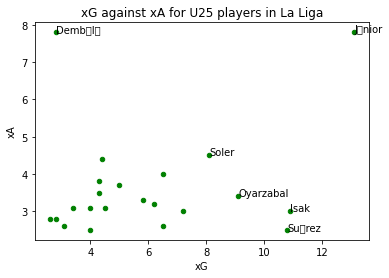

In [127]:
selectedData.plot(kind='scatter',x='xG',y='xA',color='green')
plt.title('xG against xA for U25 players in La Liga')


for a, row in selectedData.iterrows():
    afor_val=selectedData.at[a,'Player'].split(" ",1)
    try:
        selectedData.at[a,'Player']=afor_val[1]
    except:
        selectedData.at[a,'Player']=afor_val[0]
    
for index, row in selectedData.iterrows():
    if row['xG']>8 or row['xA']>4.5:
        plt.text(row['xG'],row['xA'],row['Player'])
plt.show()

   
